In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [15]:
# Took the data from the slides on linear regression

years = [1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 
         1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000,
         2004, 2008, 2012] 

time = [12.00, 11.00, 11.00, 10.80, 10.80, 10.80, 10.60, 10.80, 10.32, 10.30, 
        10.30, 10.40, 10.50, 10.20, 10.00, 9.95, 10.14, 10.06, 10.25, 9.99, 
        9.92, 9.96, 9.84, 9.87, 9.85, 9.69, 9.63]

In [16]:
from ridge import RidgeRegression

Our Model's MSE: 0.19447330491999762
scikit-learn Model MSE: 0.18584114069831545


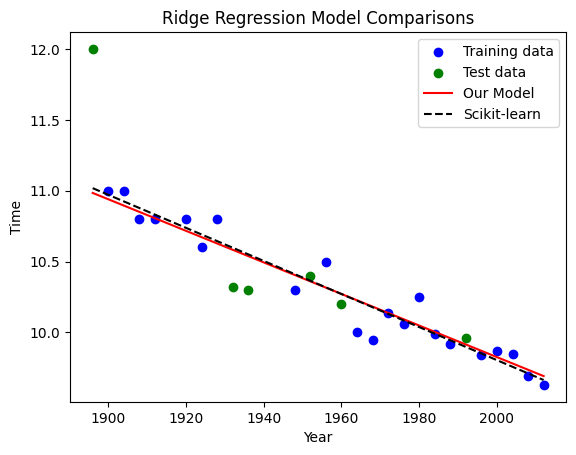

In [17]:
years = np.array(years).reshape(-1, 1)  # Reshape to be a 2D array
time = np.array(time)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(years, time, test_size=0.2, random_state=42)

our_model = RidgeRegression(alpha=1)
our_model.fit(X_train, y_train)
predictions = our_model.predict(X_test)

# scikit-learn Ridge Regression model
sklearn_ridge = Ridge(alpha=1)
sklearn_ridge.fit(X_train, y_train)
sklearn_predictions = sklearn_ridge.predict(X_test)

# Compare the models using mean squared error
our_model_mse = mean_squared_error(y_test, predictions)
sklearn_mse = mean_squared_error(y_test, sklearn_predictions)

print(f"Our Model's MSE: {our_model_mse}")
print(f"scikit-learn Model MSE: {sklearn_mse}")

# Plotting the results to visualize the fit
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(years, our_model.predict(years.reshape(-1, 1)), color='red', label='Our Model')
plt.plot(years, sklearn_ridge.predict(years.reshape(-1, 1)), color='black', linestyle='--', label='Scikit-learn')
plt.xlabel('Year')
plt.ylabel('Time')
plt.title('Ridge Regression Model Comparisons')
plt.legend()
plt.show()

#### Visualization with different values of alpha

/var/folders/c3/1jkjmwxx5vncr00sw0gklknr0000gp/T/ipykernel_24760/2658473967.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xticks(np.arange(min(years), max(years) + 1, 10))  # Setting x-axis to 10-year intervals


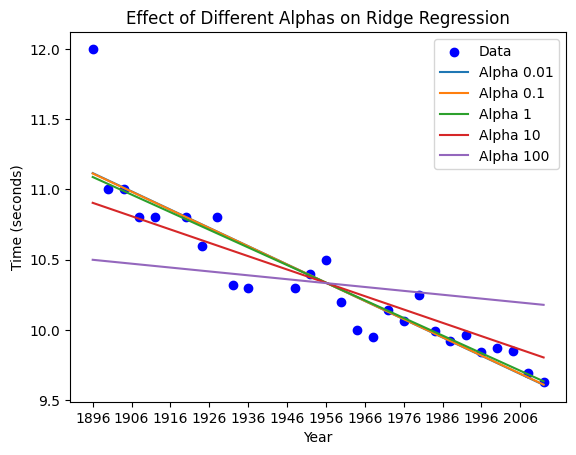

In [18]:
X = np.array(years).reshape(-1, 1)
y = np.array(time)

# Choose a range of alpha values to test
alpha_values = [0.01, 0.1, 1, 10, 100]

# Plot the original data
plt.scatter(years, time, color='blue', label='Data')

# Fit and plot a line for each alpha
for alpha in alpha_values:
    # Fit the model
    model = RidgeRegression(alpha=alpha)
    model.fit(X, y)
    
    # Generate predictions for the range of years
    predictions = model.predict(X)
    
    # Plot the regression line
    plt.plot(years, predictions, label=f'Alpha {alpha}')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Time (seconds)')
plt.title('Effect of Different Alphas on Ridge Regression')
plt.legend()
plt.xticks(np.arange(min(years), max(years) + 1, 10))  # Setting x-axis to 10-year intervals

# Display the plot
plt.show()


#### References
1. [Regularization Part 1: Ridge (L2) Regression](https://www.youtube.com/watch?v=Q81RR3yKn30&list=TLPQMjQwMTIwMjTjW5is4UUWOg&index=1)
2. [Ridge Regression From Scratch In Python \[Machine Learning Tutorial\]](https://www.youtube.com/watch?v=mpuKSovz9xM&list=TLPQMjQwMTIwMjTjW5is4UUWOg&index=4)